In [2]:
# Importing the required libraries  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 

In [3]:
from sklearn import metrics  
import seaborn as sns  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn import tree

In [4]:
# Loading the dataset  
iris = load_iris()  

In [5]:
#converting the data to a pandas dataframe  
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)  

In [6]:
#creating a separate column for the target variable of iris dataset   
data['Species'] = iris.target

In [7]:
#replacing the categories of target variable with the actual names of the species  
target = np.unique(iris.target)  
target_n = np.unique(iris.target_names)  
target_dict = dict(zip(target, target_n))  
data['Species'] = data['Species'].replace(target_dict)  

In [8]:
# Separating the independent dependent variables of the dataset  
x = data.drop(columns = "Species")  
y = data["Species"]  
names_features = x.columns  
target_labels = y.unique() 

In [9]:
# Splitting the dataset into training and testing datasets  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)  

In [10]:
# Importing the Decision Tree classifier class from sklearn  
from sklearn.tree import DecisionTreeClassifier  

In [11]:
# Creating an instance of the classifier class  
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)  

In [12]:
# Fitting the training dataset to the model  
dtc.fit(x_train, y_train)  

DecisionTreeClassifier(max_depth=3, random_state=93)

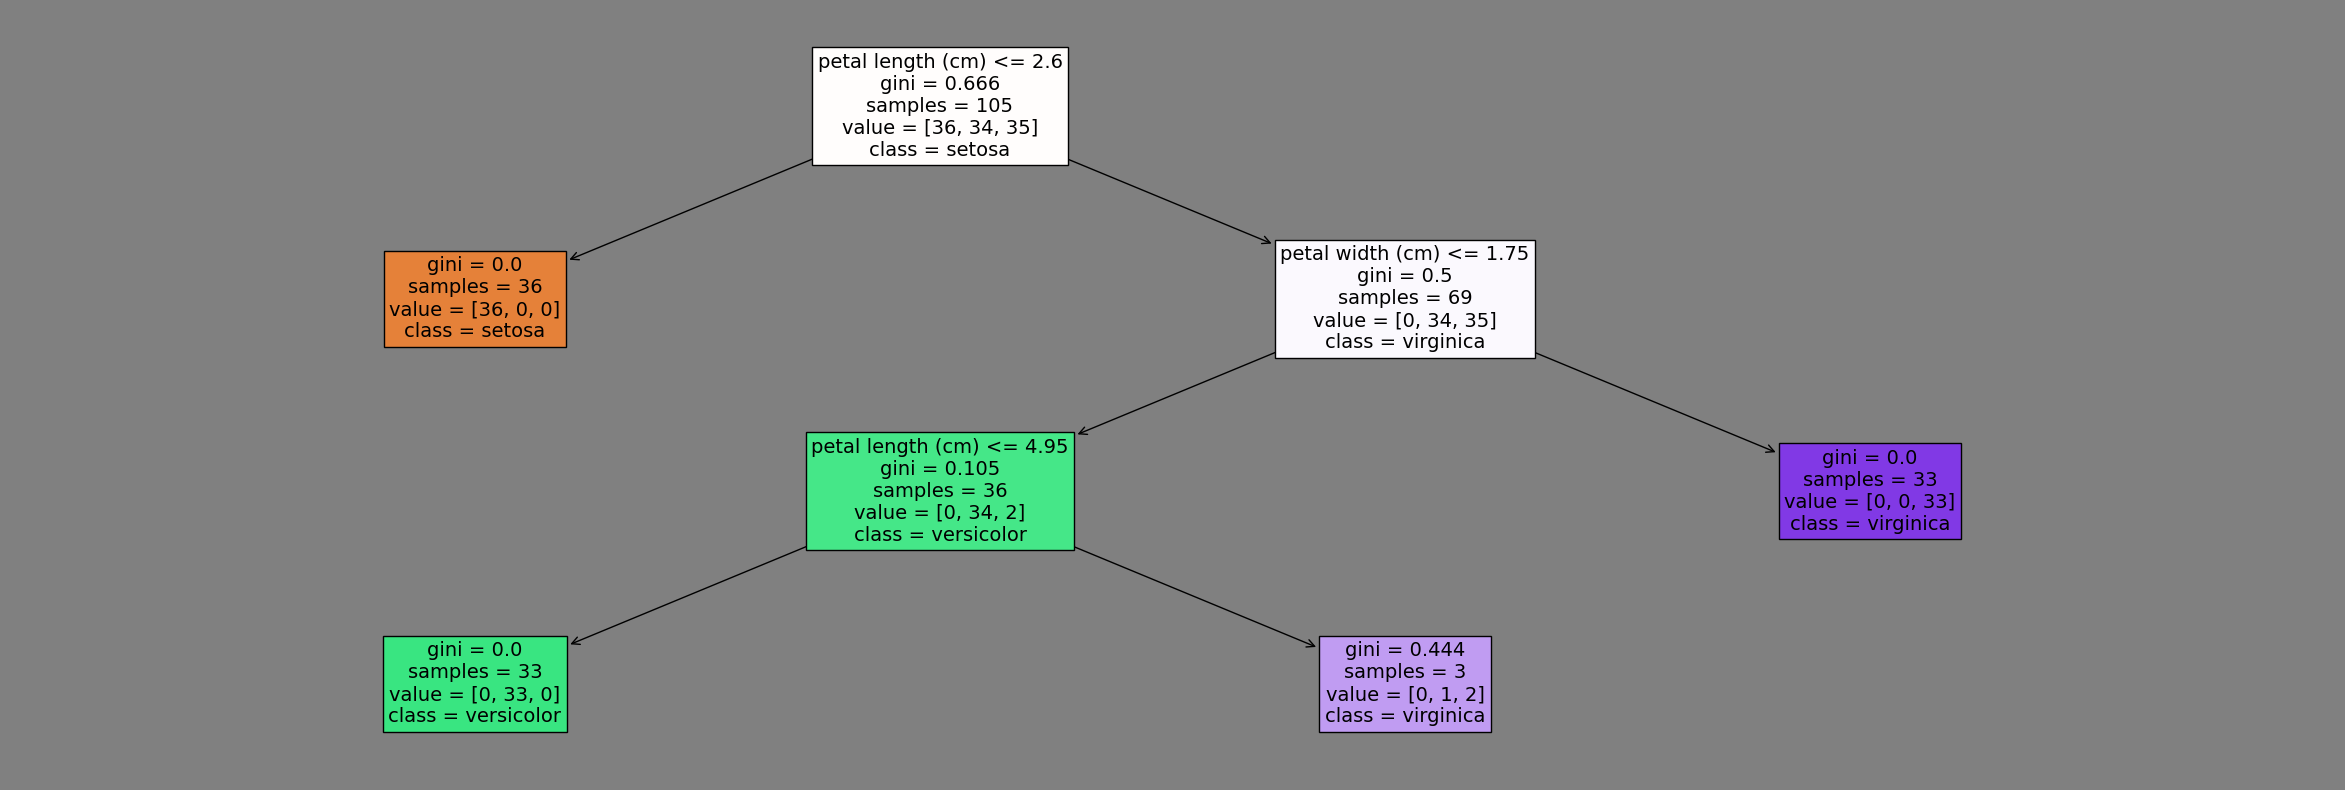

In [13]:
# Plotting the Decision Tree  
plt.figure(figsize = (30, 10),facecolor = 'grey')  
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, filled = True, fontsize = 14)  
plt.show()  
y_pred = dtc.predict(x_test)

<Figure size 1000x700 with 0 Axes>

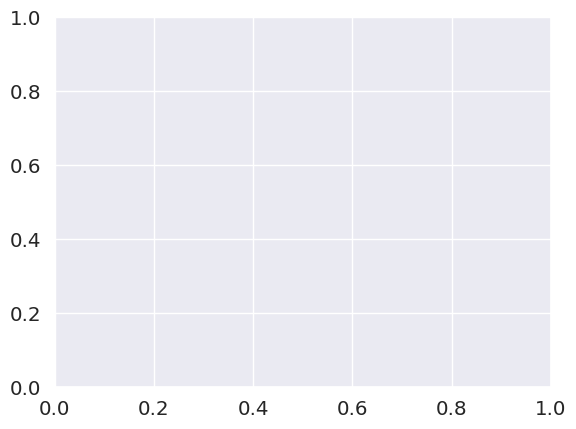

<Figure size 1000x700 with 0 Axes>

In [18]:
# Finding the confusion matrix  
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix)  
axis = plt.axes()  
sns.set(font_scale = 1.3)  
plt.figure(figsize = (10,7))  

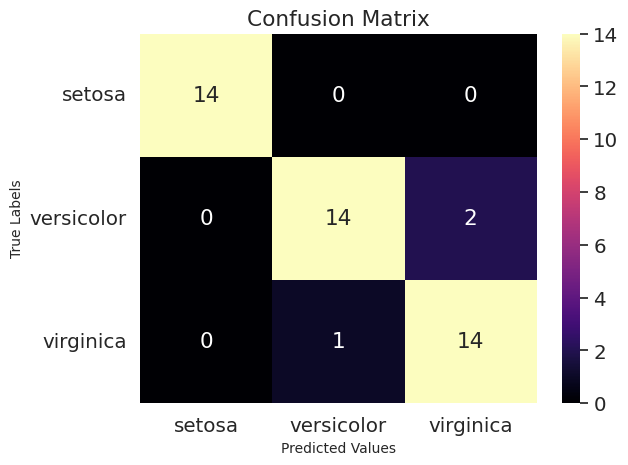

In [15]:
# Plotting heatmap 
axis = sns.heatmap(matrix, annot = True, fmt = "g", cmap = "magma")  
axis.set_title('Confusion Matrix')  
axis.set_xlabel("Predicted Values", fontsize = 10)  
axis.set_xticklabels([''] + target_labels)  
axis.set_ylabel( "True Labels", fontsize = 10)  
axis.set_yticklabels(list(target_labels), rotation = 0)  
plt.show() 

In [16]:
#https://www.javatpoint.com/decision-tree-in-python-sklearn